## Notebook Imports:

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Gather Data:

Source:[University of Michigan](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)

In [2]:
boston_dataset = load_boston()
print(type(boston_dataset))

<class 'sklearn.utils.Bunch'>


In [3]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Data-points & Features

In [5]:
print(type(boston_dataset.data))

<class 'numpy.ndarray'>


In [6]:
print(boston_dataset.data.shape)

(506, 13)


In [7]:
#Values are in 1000$
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data exploration with pandas dataframe(DF)

In [8]:
#Create pandas DF
data = pd.DataFrame(data = boston_dataset.data, columns = boston_dataset.feature_names)

#Adding column with price (target)
data['PRICE'] = boston_dataset.target

In [9]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
data.count() #Returns number of columns

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning Data - checking for missing values

In [11]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualizing Data: Histograms, Distributions & Bar charts

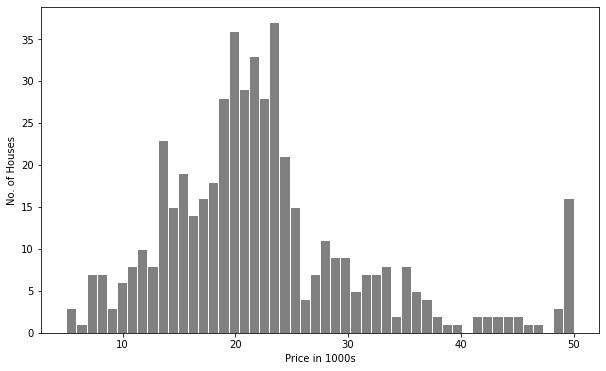

In [13]:
plt.figure(figsize = (10, 6))
plt.hist(data['PRICE'], bins = 50, ec = 'white', color = 'grey')
plt.xlabel('Price in 1000s')
plt.ylabel('No. of Houses')
plt.show()

/home/kunnaal/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


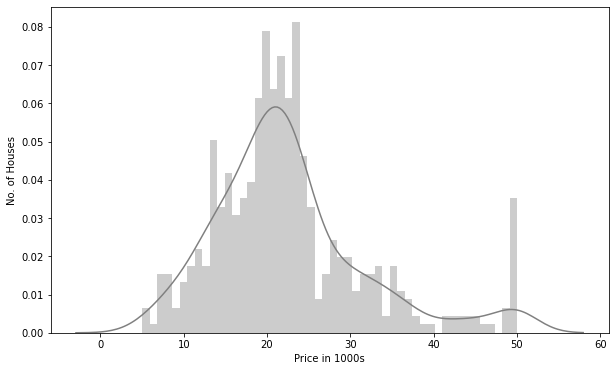

In [14]:
plt.figure(figsize = (10, 6))
sns.distplot(data['PRICE'], bins = 50, color = 'gray')
plt.xlabel('Price in 1000s')
plt.ylabel('No. of Houses')
plt.show()

/home/kunnaal/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


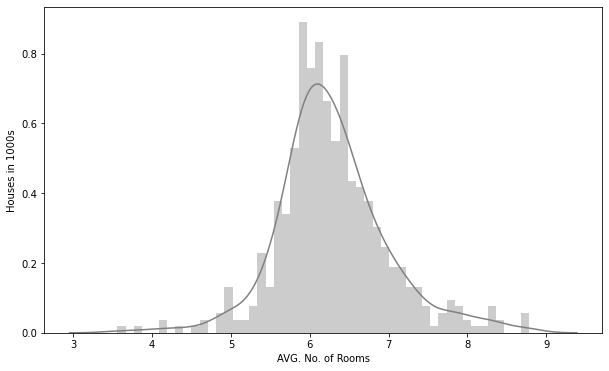

In [15]:
plt.figure(figsize = (10, 6))
sns.distplot(data['RM'], bins = 50, color = 'gray')
plt.xlabel('AVG. No. of Rooms')
plt.ylabel('Houses in 1000s')
plt.show()

In [16]:
print("Avg no of rooms:", data['RM'].mean())

Avg no of rooms: 6.284634387351787


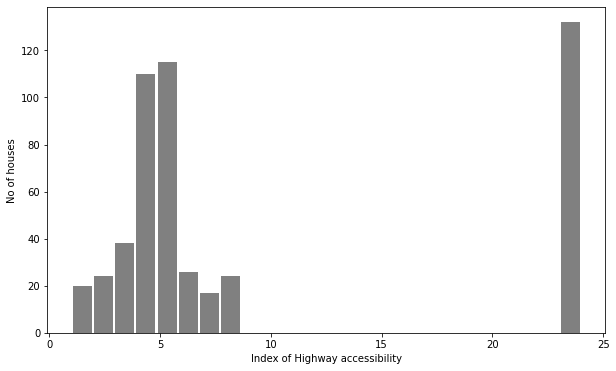

In [17]:
plt.figure(figsize = (10, 6))
plt.hist(data['RAD'], bins = 24, rwidth = 0.9, color = 'gray')
plt.xlabel('Index of Highway accessibility')
plt.ylabel('No of houses')
plt.show()

In [18]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [19]:
frequency = data['RAD'].value_counts()
print(type(frequency))
# frequencindexdex
frequency.axes[0]

<class 'pandas.core.series.Series'>


Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 2.0, 8.0, 1.0, 7.0], dtype='float64')

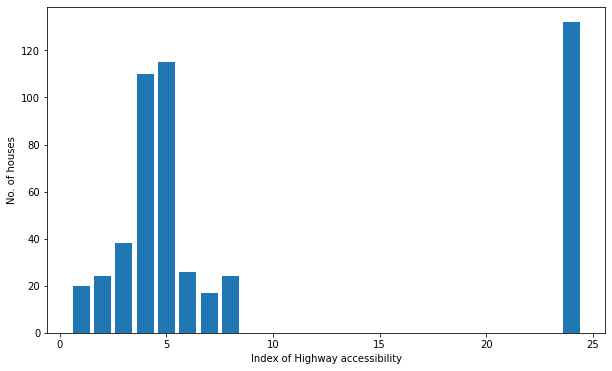

In [20]:
plt.figure(figsize = (10, 6))
plt.bar(frequency.index, height = frequency)
plt.xlabel('Index of Highway accessibility')
plt.ylabel('No. of houses')
plt.show()

In [21]:
print('Houses near Charles River:', data['CHAS'].value_counts())

Houses near Charles River: 0.0    471
1.0     35
Name: CHAS, dtype: int64


In [22]:
# print('Mean & Median of whole data:\n', data.mean(), data.median())
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation:

<img src='./Correlation_Imgs/Positive_correlation.png' alt='Positive Correlation Img'>

<img src='./Correlation_Imgs/Negative_correlation.png' alt='Negative Correlation Img'>

<img src='./Correlation_Imgs/No_correlation.png' alt='No Correlation Img'>

<img src='./Correlation_Imgs/Correlation_denotation.png' alt='Correlation Denotation Img'>

$$ \rho _{xy} = corr(X, Y)$$
Note: $$ -1.0 \leq \rho _{xy} \leq +1.0 $$
-1 indicates perfectly negative correlation & +1 indicates perfectly positive correlation. 0 means no correlation at all.

In [23]:
print('Correlation between price and no of rooms:', data['PRICE'].corr(data['RM']))

Correlation between price and no of rooms: 0.695359947071539


In [24]:
print('Correlation between price and pupil teacher ratio:', data['PRICE'].corr(data['PTRATIO']))

Correlation between price and pupil teacher ratio: -0.5077866855375615


In [25]:
data.corr() #Pearson correlation coefficients

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


**Multicollinearity** is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model. Multicollinearity can lead to skewed or misleading results when a researcher or analyst attempts to determine how well each independent variable can be used most effectively to predict or understand the dependent variable in a statistical model.

In [26]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

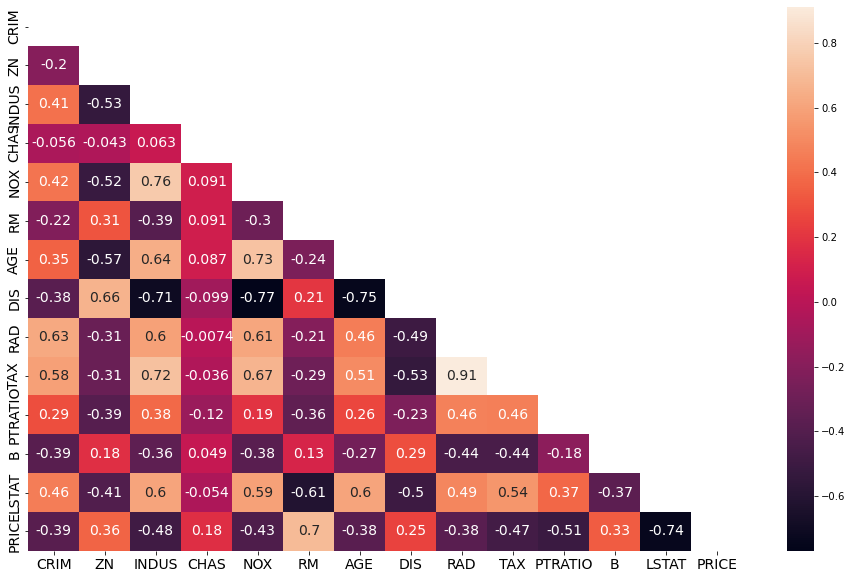

In [27]:
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), mask = mask, annot = True, annot_kws = {"size": 14})
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

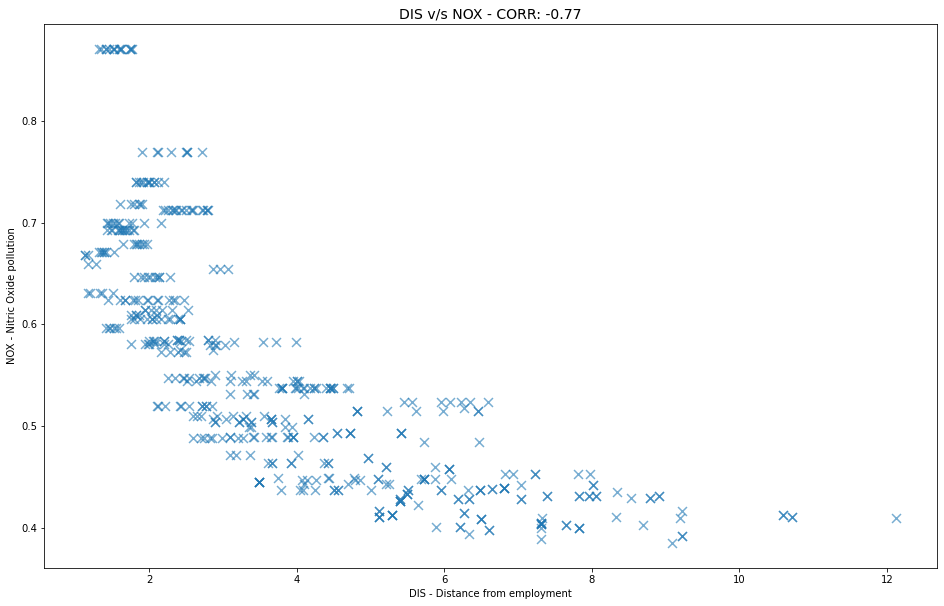

In [28]:
nox_dir_corr = data['NOX'].corr(data['DIS'])

plt.figure(figsize = (16, 10))
plt.scatter(x=data['DIS'], y=data['NOX'], marker='x', alpha=0.6, s=80)
plt.title(f'DIS v/s NOX - CORR: {round(nox_dir_corr, 2)}', fontsize = 14)
plt.xlabel('DIS - Distance from employment')
plt.ylabel('NOX - Nitric Oxide pollution')
plt.show()

<Figure size 1152x720 with 0 Axes>

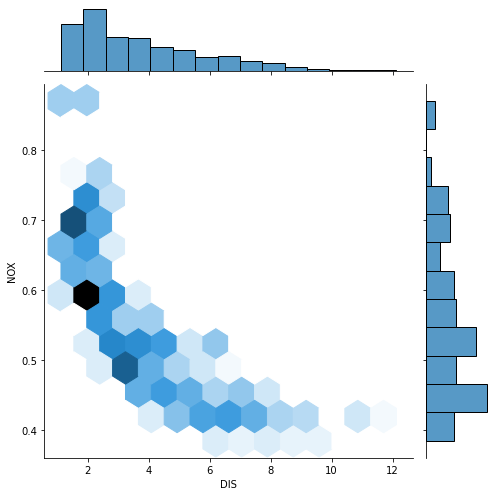

In [29]:
plt.figure(figsize = (16, 10))
sns.jointplot(x=data['DIS'], y=data['NOX'], height=7, kind='hex')
plt.show()

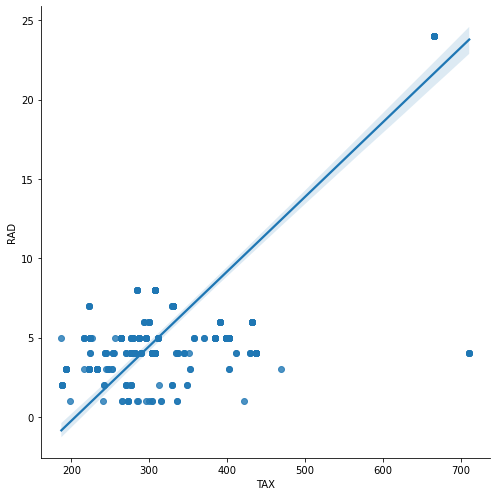

In [30]:
sns.lmplot(x='TAX', y='RAD', data=data, height=7)
plt.show()

As is visible in the heatmap, correlation of TAX and RAD is 0.91 with is nearly 1, that means out data is highly correlated right? But the above linear regression between TAX & RAD shows otherwise. The data point in top right corner is affecting the slope of our regression line significantly. So the model of 'Linear regression' is not so useful in our case.

Positive Correlation: 0.695


<Figure size 1152x720 with 0 Axes>

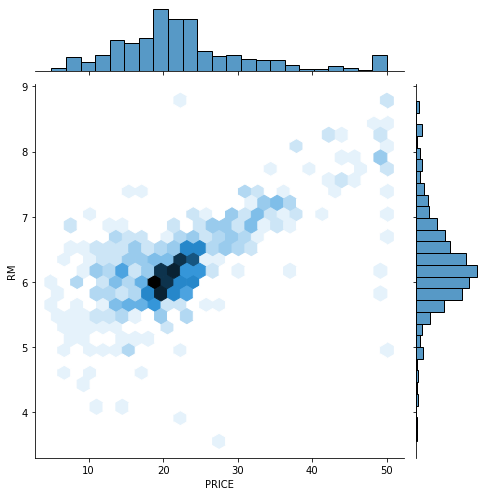

In [31]:
#Scatter plot between house price & no. of rooms:

print(f"{'Positive' if data['RM'].corr(data['PRICE'])>0.5 else 'Negative'} Correlation: {round(data['RM'].corr(data['PRICE']), 3)}")
plt.figure(figsize = (16, 10))
sns.jointplot(x=data['PRICE'], y=data['RM'], height=7, kind='hex')
plt.show()

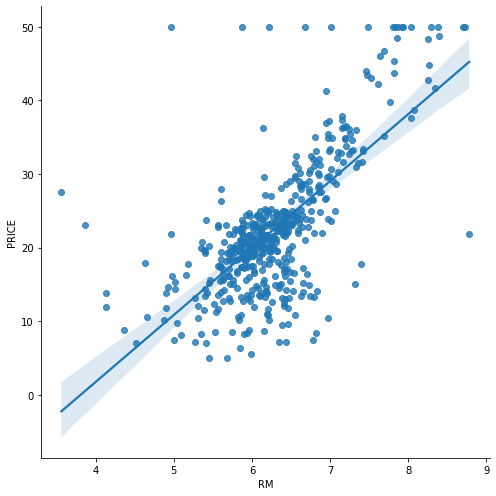

In [32]:
# Linear regression b/w RM/PRICE:

sns.lmplot(x='RM', y='PRICE', data=data, height=7)
plt.show()

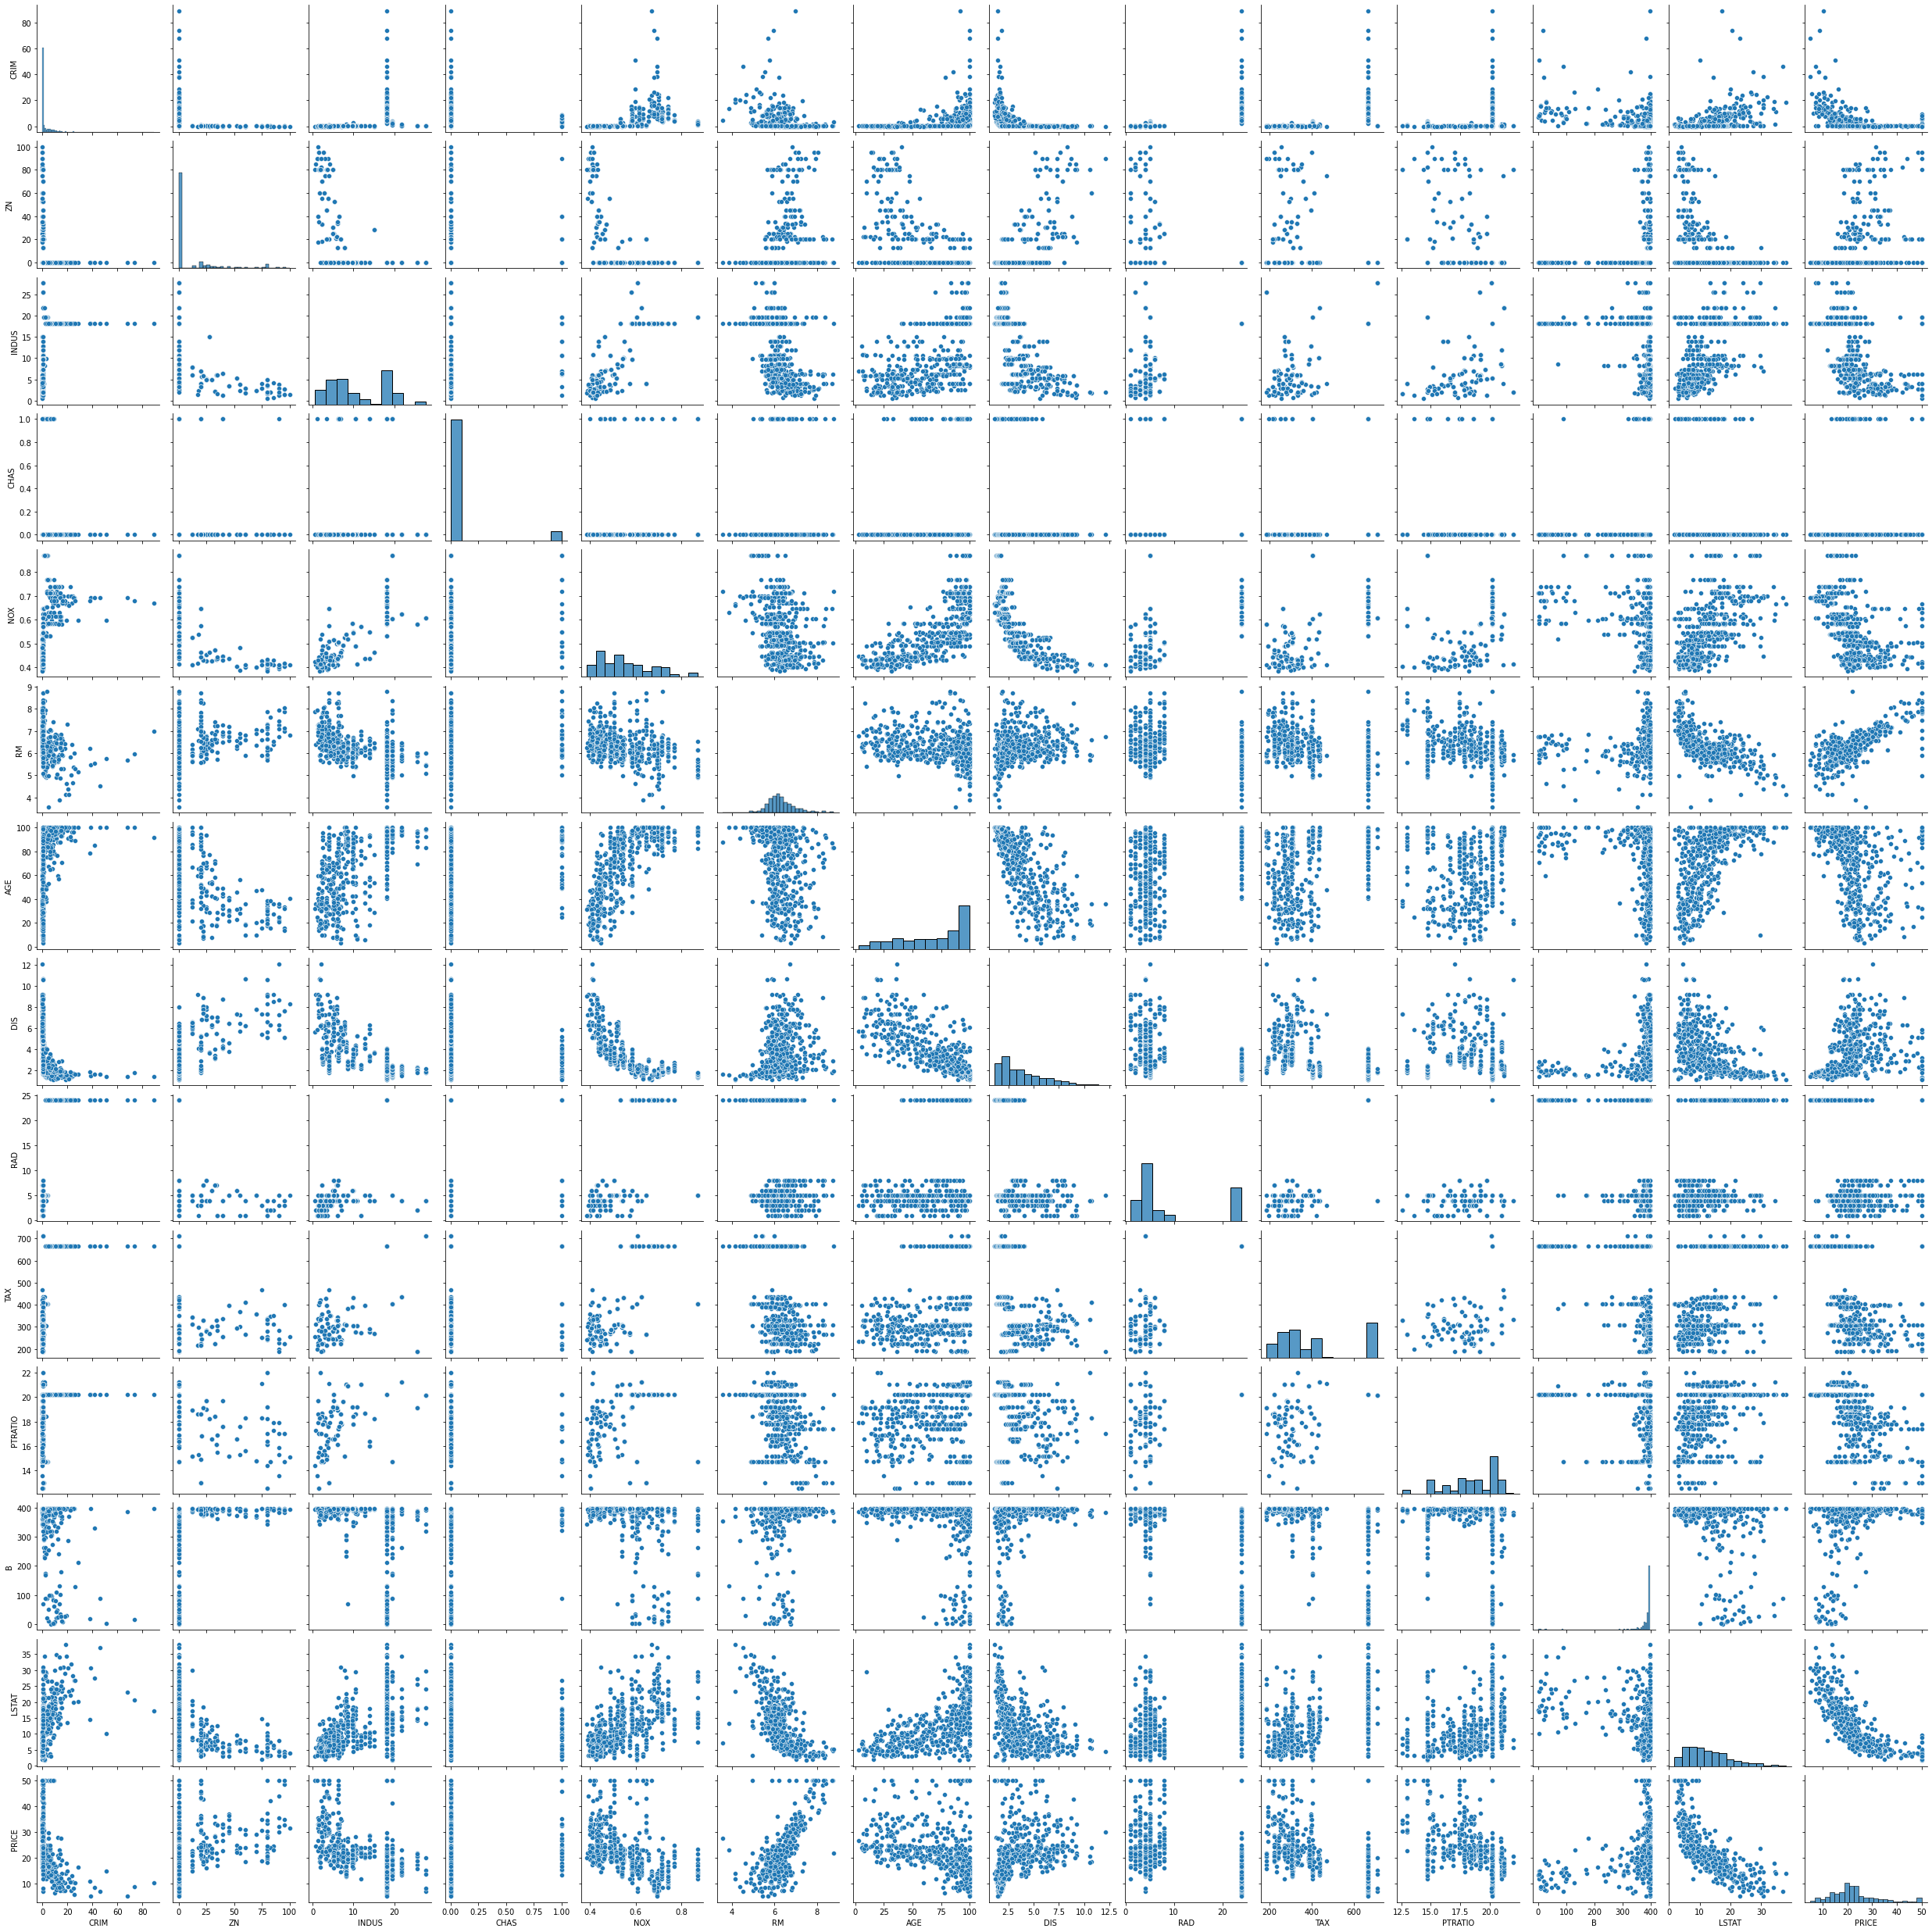

CPU times: user 41 s, sys: 243 ms, total: 41.3 s
Wall time: 41.4 s


In [33]:
%%time

#Plotting every combination

sns.pairplot(data)
plt.show()

**Note:** you need to write %%time in **first line of your cell**, otherwise it won't work. Also, if in a cell you use **%%time**, the changes made in that cell are not global, i.e. they are not taken into consideration for the next cell, example: if you declare a variable **a**, it will be undefined for the cell below.

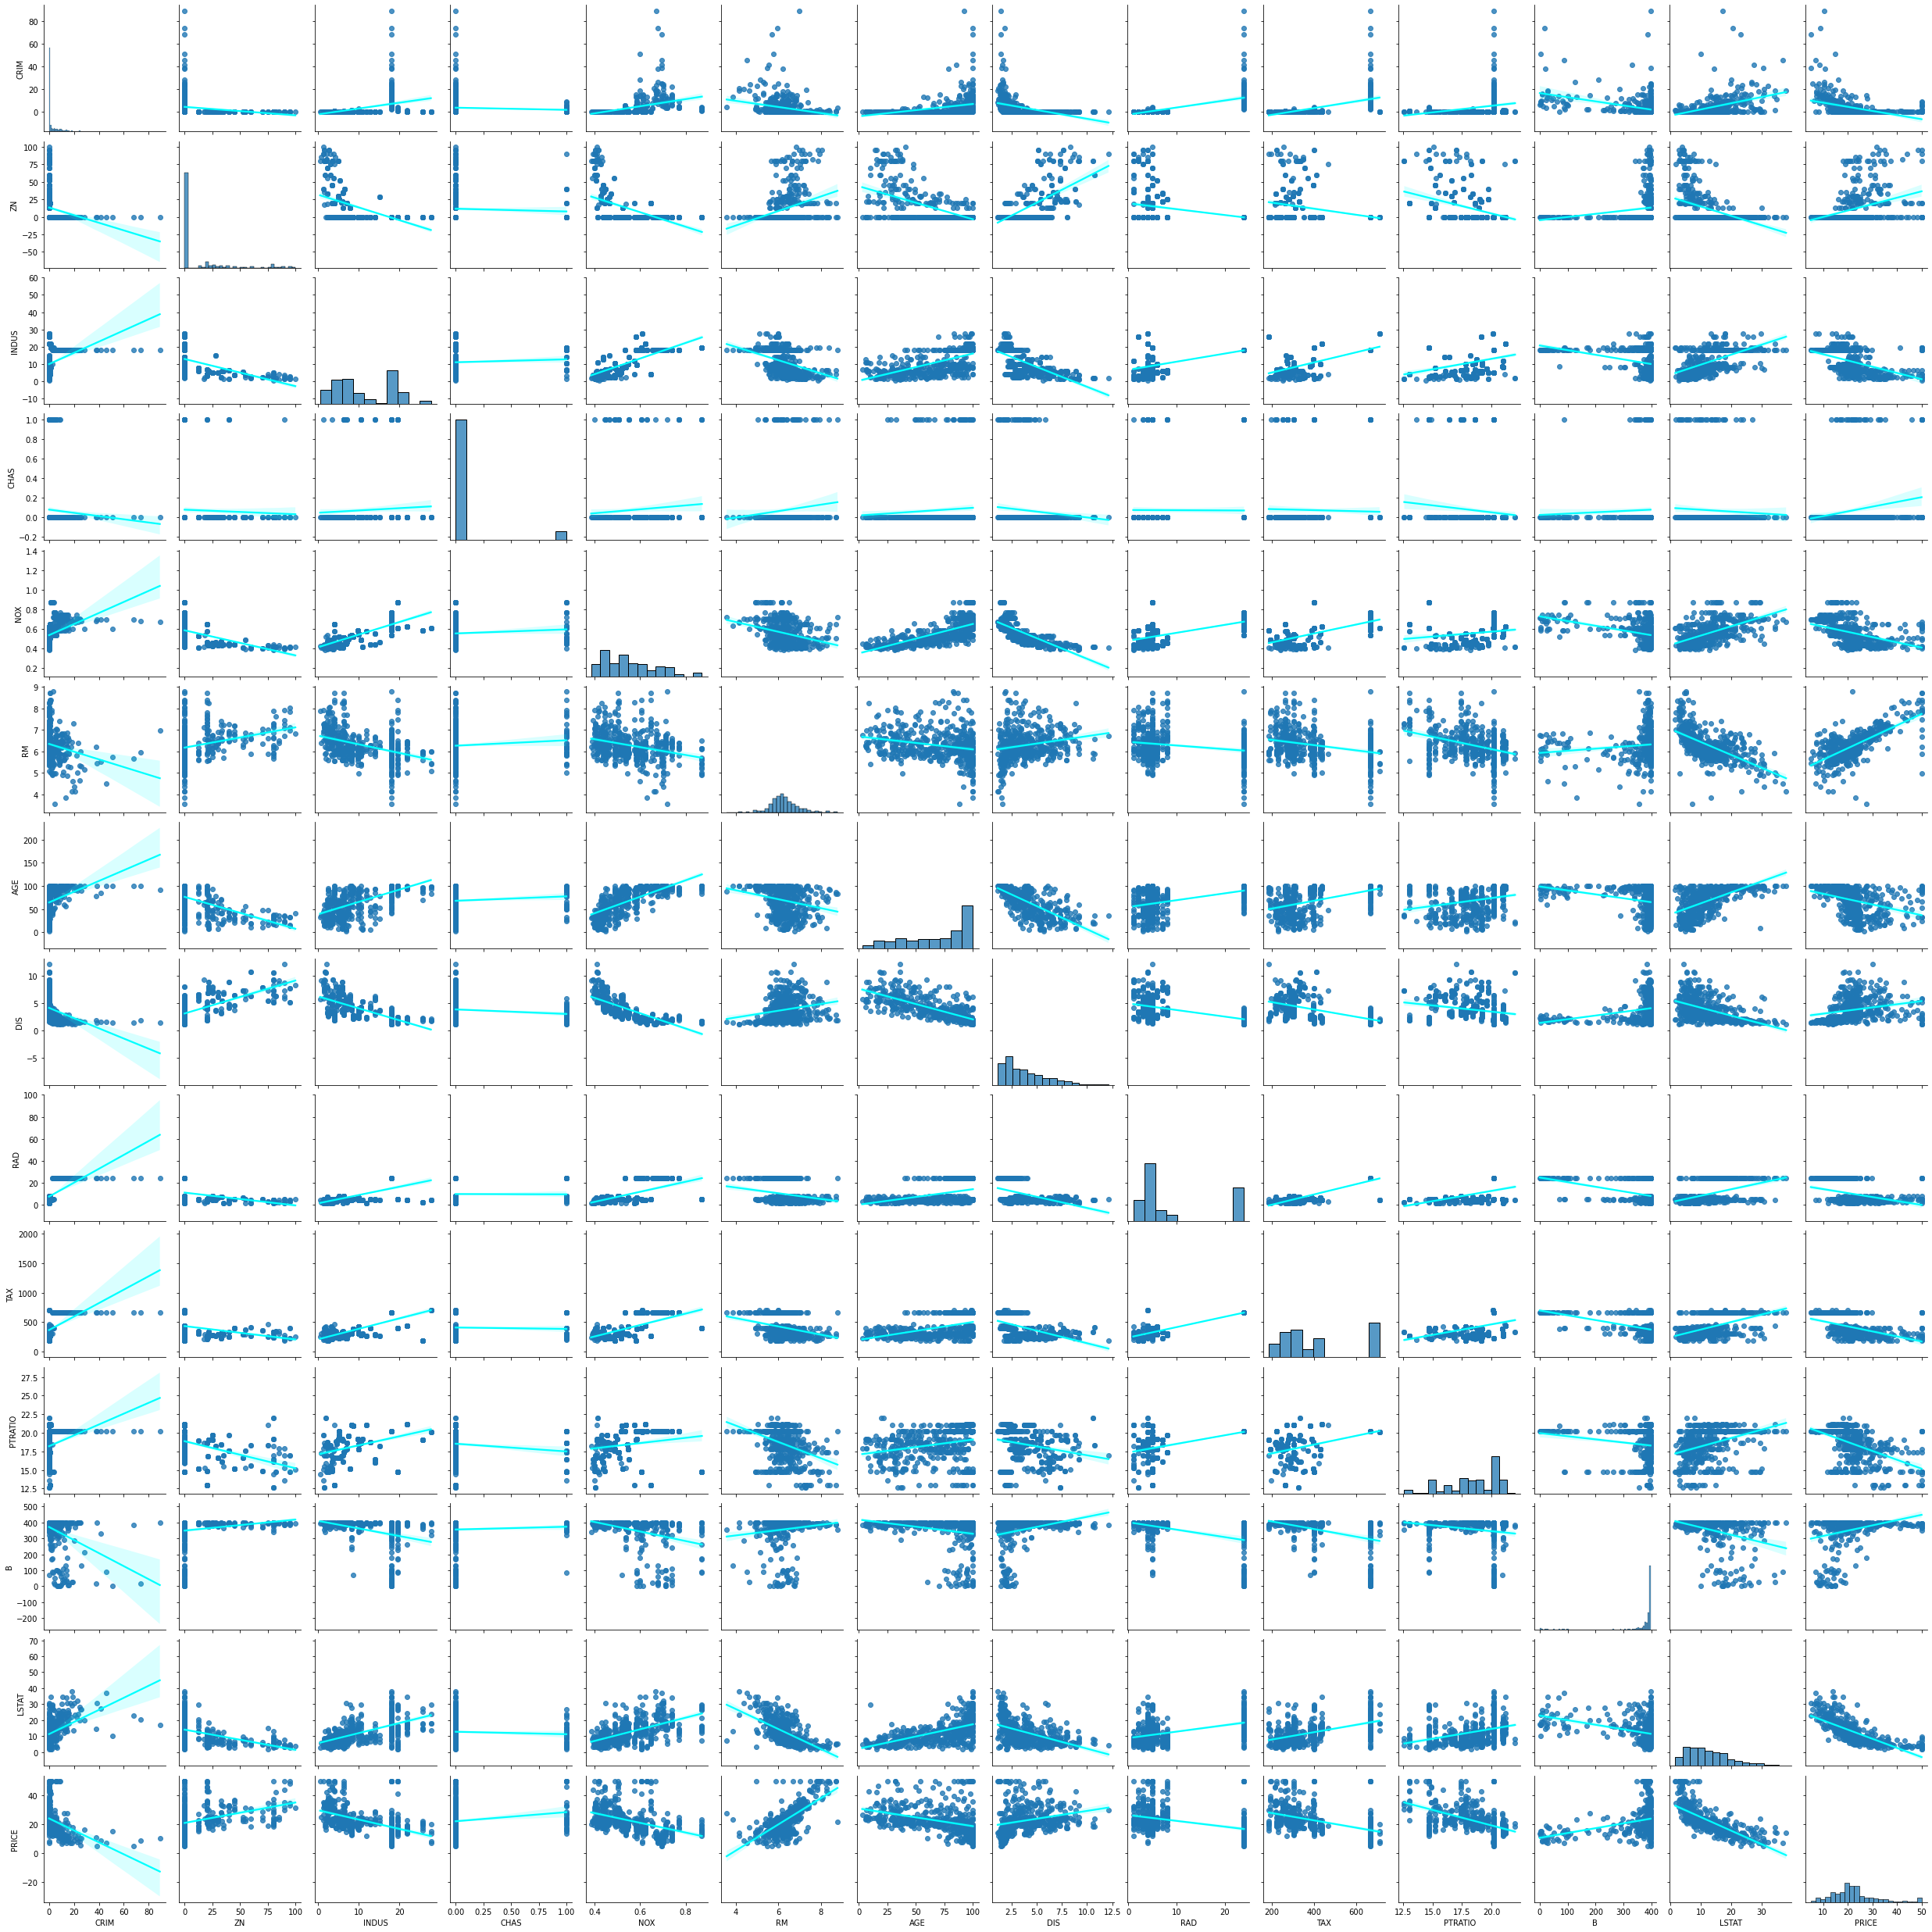

CPU times: user 1min 46s, sys: 2 s, total: 1min 48s
Wall time: 1min 13s


In [34]:
%%time

#Plotting all possibility with their regressions:

sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})
plt.show()

## Training & Test dataset split

In [35]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1) #axis = 1 : column, 0: row
X_train, X_test, y_train, y_test = train_test_split(features, prices, train_size=0.2, random_state=10)

In [36]:
print(f"% of train data: {round((X_train.shape[0]/features.shape[0])*100, 2)}")

% of train data: 19.96


## Multivariable Regression

In [37]:
regr = LinearRegression()
regr.fit(X_test, y_test)

print(f'Regression Intercept: {regr.intercept_}')
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coefs'])

Regression Intercept: 33.756571181636566


,coefs
CRIM,-0.115191
ZN,0.032112
INDUS,0.012313
CHAS,2.877469
NOX,-14.709517
RM,4.086800
AGE,-0.006742
DIS,-1.341753
RAD,0.329746
TAX,-0.013430


In [38]:
print('Training dataset r-squared:', regr.score(X_train, y_train))
print('Testing dataset r-squared:', regr.score(X_test, y_test))

Training dataset r-squared: 0.662986854577424
Testing dataset r-squared: 0.7555885600852323


## Data Transformations

In [39]:
data['PRICE'].skew()

1.1080984082549072

Skew shold be 0 for good linear regression

Skew Visualization:<br>
<img src='./Multivariable_Imgs/Skew_Img.png' alt='skew image'>

In [40]:
y_log = np.log(data['PRICE'])
print(y_log.tail())

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64


/home/kunnaal/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


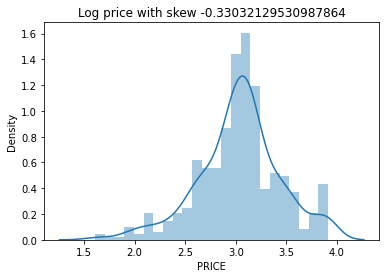

In [41]:
sns.distplot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

Skew of -0.33 is better then skew of 1.1 as it is closer to 0 hence more symmetric.

**Note:** We use log to reduce the higer values by significant amount $(ln(50) = 3.9, diff = 46.1)$ whereas log of smaller values have less difference $(ln(3) = 1.09, diff = 1.91)$. Ultimate goal is to reduce skew

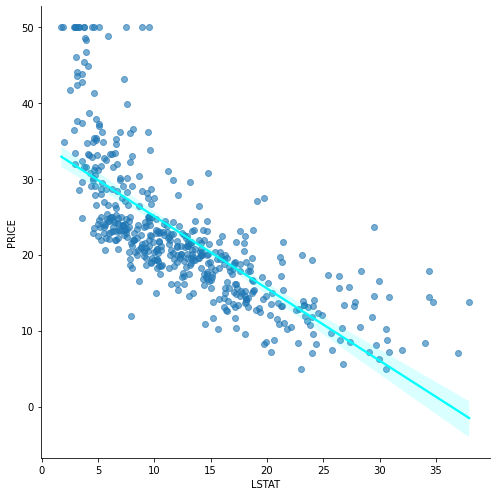

In [42]:
sns.lmplot(x='LSTAT', y='PRICE', data=data, height=7, scatter_kws={'alpha':0.6}, line_kws={'color': 'cyan'})
plt.show()

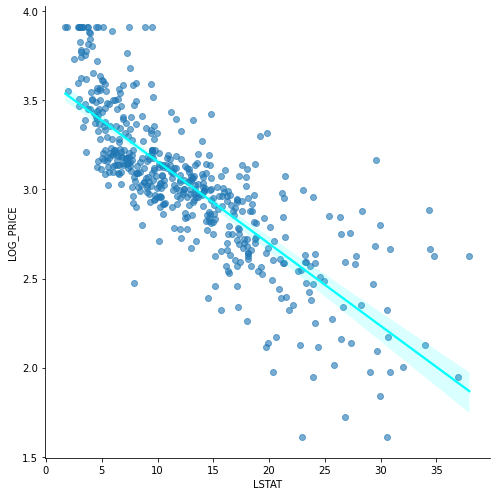

In [43]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log
sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, height=7, scatter_kws={'alpha':0.6}, line_kws={'color': 'cyan'})
plt.show()

## Regression using log prices

In [44]:
prices = np.log(data['PRICE']) #Using log prices
features = data.drop('PRICE', axis=1) #axis = 1 : column, 0: row
X_train, X_test, y_train, y_test = train_test_split(features, prices, train_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_test, y_test)

print('Training dataset r-squared:', regr.score(X_train, y_train))
print('Testing dataset r-squared:', regr.score(X_test, y_test))
print(f'Regression Intercept: {regr.intercept_}')
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coefs'])

Training dataset r-squared: 0.7242908424820047
Testing dataset r-squared: 0.7999341422622382
Regression Intercept: 4.082244600795928


,coefs
CRIM,-0.010353
ZN,0.000684
INDUS,0.001357
CHAS,0.108847
NOX,-0.674751
RM,0.094089
AGE,-0.000005
DIS,-0.045514
RAD,0.013949
TAX,-0.000629


In [45]:
#Charles river propery premium:
print(np.e**regr.coef_[2])

1.0013575926395397
